In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [5]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [6]:
df = df.drop(columns=['Date'])

In [7]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0, 0.5, 'Ending (USD)')

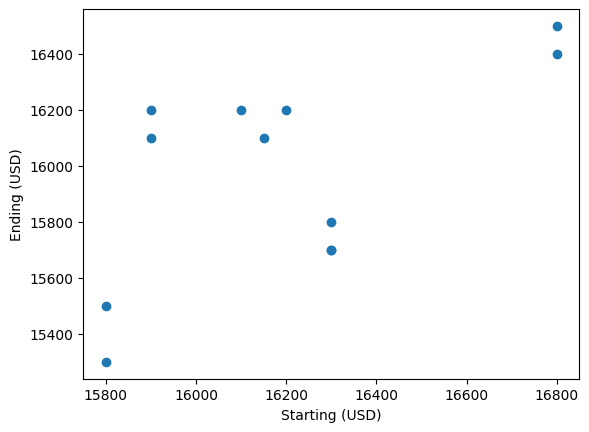

In [8]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")

In [1]:
x = df.drop(columns=['Ending (USD)'])

NameError: name 'df' is not defined

In [10]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [11]:
y = df['Ending (USD)']
y.head()

0    16500
1    16100
2    15300
3    16200
4    15700
Name: Ending (USD), dtype: int64

Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [15]:
y.mean()

np.float64(15975.0)

Text(0, 0.5, 'Ending (USD)')

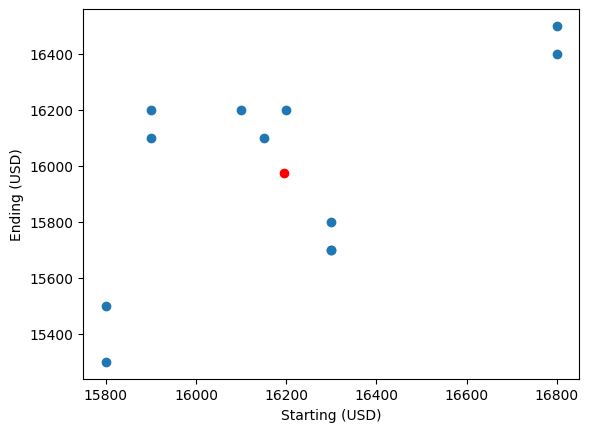

In [16]:
plt.scatter(x.mean(), y.mean(), color="red")
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")

In [17]:
reg.fit(x,y) #train the model

LinearRegression()

In [18]:
m=reg.coef_
m

array([0.65258293])

In [19]:
c = reg.intercept_
c

np.float64(5405.875557022609)

In [20]:
# y = mx + c
m*16700 + c

array([16304.0105628])

In [21]:
reg.predict([[16700]])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16304.0105628])

In [22]:
df['predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0, 0.5, 'Ending (USD)')

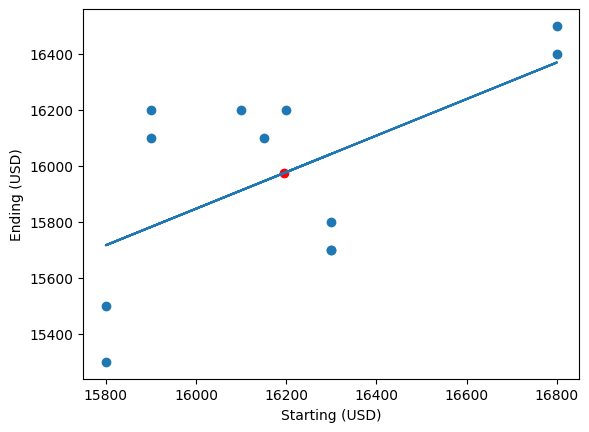

In [23]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color="red")
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")

In [24]:
reg.predict([[16600]])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16238.75226935])

Lose and Cost

In [25]:
df['lose'] = df['Ending (USD)'] - df['predicted_y']
df.head()

,Starting (USD),Ending (USD),predicted_y,lose
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [26]:
#MSE & MAE

from sklearn.metrics import mean_squared_error, mean_absolute_error


In [27]:
#recomanded
mse = mean_squared_error(df['Ending (USD)'], df['predicted_y'])
mse

80411.23397700385

In [28]:
mae = mean_absolute_error(df['Ending (USD)'], df['predicted_y'])
mae

260.3840017604666

In [29]:
#behind MAE
sum(abs(df['lose'])) / len(x)

260.3840017604666

In [30]:
reg.score(x,y)

0.3577804940272571

Text(0, 0.5, 'Ending (USD)')

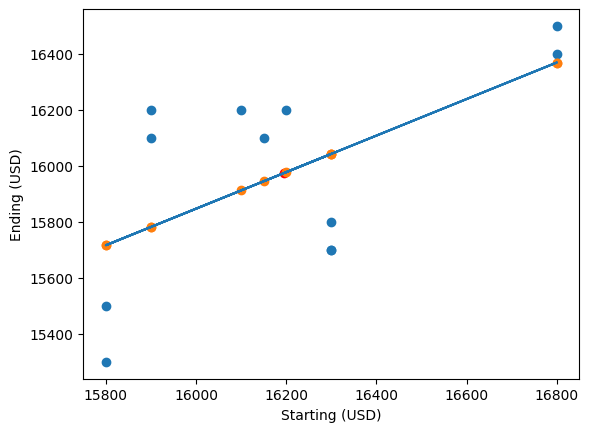

In [31]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color="red")
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.scatter(df['Starting (USD)'], reg.predict(x))
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")

In [32]:
reg.score(x,y)

0.3577804940272571

In [33]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571